In [1]:
# Setting up the Colab environment. DO NOT EDIT!
import os
#import warnings
#warnings.filterwarnings("ignore")

try:
    import otter, pingouin

except ImportError:
    ! pip install -q otter-grader==4.0.0, pingouin
    import otter

if not os.path.exists('lab-tests'):
    zip_files = [f for f in os.listdir() if f.endswith('.zip')]
    assert len(zip_files)>0, 'Could not find any zip files!'
    assert len(zip_files)==1, 'Found multiple zip files!'
    ! unzip {zip_files[0]}

grader = otter.Notebook(colab=True,
                        tests_dir = 'lab-tests')

# Lab

## Learning Objectives
At the end of this learning activity you will be able to:
 - Practice using robust correlation tools that account for outliers.
 - Practice using `pg.qqplot` and `pg.normality` to asses the normality of residuals.
 - Practice using regression to create covariate-controlled scores.


In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import pingouin as pg

%matplotlib inline

In [3]:
data = pd.read_csv('hiv_neuro_data.csv')
data['education'] = data['education'].astype(float)
data.head()

,sex,age,education,race,processing_domain_z,exec_domain_z,language_domain_z,visuospatial_domain_z,learningmemory_domain_z,motor_domain_z,ART,YearsSeropositive
0,male,62,10.0,AA,0.5,0.6,0.151646,-1.0,-1.152131,-1.364306,Stavudine,13
1,male,56,10.0,AA,-0.5,1.2,-0.255505,-2.0,-0.086376,-0.348600,Truvada,19
2,female,51,10.0,AA,0.5,0.1,0.902004,-0.4,-1.139892,0.112215,Stavudine,9
3,female,47,12.0,AA,-0.6,-1.2,-0.119866,-2.1,0.803619,-2.276768,Truvada,24
4,male,46,13.0,AA,-0.4,1.3,0.079129,-1.3,-0.533607,-0.330541,Truvada,14


This lab is going to explore the inter-relationships between two cognitive domains.

* **Executive Function**: The complex cognitive processes required for planning, organizing, problem-solving, abstract thinking, and executing strategies. This domain also encompasses decision-making and cognitive flexibility, which is the ability to switch between thinking about two different concepts or to think about multiple concepts simultaneously.
- **Speed of Information Processing**: How quickly an individual can understand and react to the information being presented. This domain evaluates the speed at which cognitive tasks can be performed, often under time constraints.

We will explore whether these two domains are correllated after controlling for co-variates.

### Q1: Are Processing domain and Executive domain scores correlated?

Checked variables:
 * `q1_plot` - A regression plot between `processing_domain_z` and `exec_domain_z`.
 * `q1_corr_res` - The result of running `pg.corr` on `processing_domain_z` and `exec_domain_z`.
 * `q1_is_corr` - A yes/no assessment of the correlation between `processing_domain_z` and `exec_domain_z`.

|               |    |
| --------------|----|
| Points        | 5  |
| Public Checks | 3  |
| Hidden Tests  | 1  |

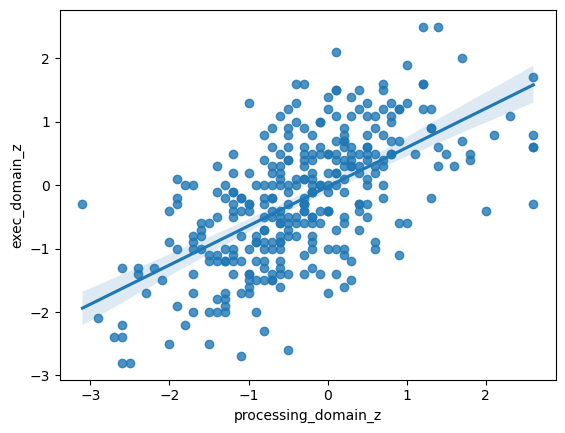

In [4]:
# Generate a plot between processing_domain_z and exec_domain_z

q1_plot = sns.regplot(data = data, x = 'processing_domain_z', y = 'exec_domain_z') # SOLUTION

In [5]:
# Use pg.corr to calculate the correlation between the two variables using a `robust` correlation metric

q1_corr_res = pg.corr(data['processing_domain_z'],  data['exec_domain_z'], method='bicor') # SOLUTION

In [6]:
# Are the two domains significantly correlated? 'yes' or 'no'

q1_is_corr = 'yes' # SOLUTION

In [7]:
print(f'q1_plot is a `Figure` or `Axes`: {isinstance(q1_plot, (plt.Figure, plt.Axes))}')

q1_plot is a `Figure` or `Axes`: True


In [8]:
print(f'q1_corr_res is a `pd.DataFrame`: {isinstance(q1_corr_res, pd.DataFrame)}')

q1_corr_res is a `pd.DataFrame`: True


In [9]:
print(f'q1_is_corr is str`: {isinstance(q1_is_corr, str)}')

q1_is_corr is str`: True


In [10]:
# HIDDEN

print(f'q1_is_corr = ', q1_is_corr)

q1_is_corr =  yes


### Q2: Create a regression for the processing domain that accounts for the following demographic covariates.

 - Age
 - Race
 - Sex
 - Education
 - Years Seropositive
 - ART

Checked variables:
 * `q2_model_resid_normal` - A yes/no assessment of the normality of the residuals after building the model. It should be supported by qqplots and normality tests.
 * `q2_processing_age` - A yes/no assessment on where age has a significant impact on `processing_domain_z`.
 * `q2_processing_race` - A yes/no assessment on where race has a significant impact on `processing_domain_z`.
 * `q2_processing_sex` - A yes/no assessment on where sex has a significant impact on `processing_domain_z`.
 * `q2_processing_edu` - A yes/no assessment on where education has a significant impact on `processing_domain_z`.
 * `q2_processing_ys` - A yes/no assessment on where infection length has a significant impact on `processing_domain_z`.
 * `q2_processing_art` - A yes/no assessment on where ART has a significant impact on `processing_domain_z`.

|               |    |
| --------------|----|
| Points        | 10 |
| Public Checks | 7  |
| Hidden Tests  | 7  |

In [11]:
# Perform the regression using `pg.linear_regression`
# Use the result to answer the questions below

# BEGIN SOLUTION NO PROMPT

X = pd.concat([data[['YearsSeropositive', 'education', 'age']],
               pd.get_dummies(data['race'], drop_first=True).astype(float),
               pd.get_dummies(data['sex'], drop_first=True).astype(float),
               pd.get_dummies(data['ART'], drop_first=True).astype(float),
              ], axis=1)
y = data['processing_domain_z']
proc_res = pg.linear_regression(X, y)
proc_res
# END SOLUTION


,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-0.262172,0.422352,-0.620742,5.352152e-01,0.457157,0.44517,-1.093140,0.568796
1,YearsSeropositive,-0.050270,0.003251,-15.460957,1.415918e-40,0.457157,0.44517,-0.056668,-0.043873
2,education,-0.008359,0.019456,-0.429610,6.677710e-01,0.457157,0.44517,-0.046638,0.029921
3,age,0.028414,0.005866,4.843836,1.995275e-06,0.457157,0.44517,0.016873,0.039956
4,C,-0.713775,0.115792,-6.164264,2.151086e-09,0.457157,0.44517,-0.941594,-0.485956
5,H,0.311427,0.147741,2.107924,3.582227e-02,0.457157,0.44517,0.020750,0.602104
6,male,-0.205072,0.092411,-2.219129,2.718563e-02,0.457157,0.44517,-0.386888,-0.023256
7,Truvada,0.154097,0.099221,1.553070,1.214043e-01,0.457157,0.44517,-0.041118,0.349311


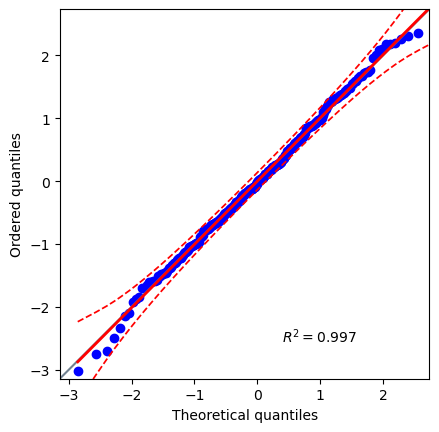

In [12]:
# Assess the normality of the residuals of the model

# BEGIN SOLUTION NO PROMPT

pg.qqplot(proc_res.residuals_)
pg.normality(proc_res.residuals_, method='normaltest')

# END SOLUTION

q2_model_resid_normal = 'yes' # SOLUTION

In [13]:
# Considering a p<0.01 threshold answer which of the following are significant

# Age
q2_processing_age = 'yes' # SOLUTION

# Race
q2_processing_race = 'yes' # SOLUTION

# Sex
q2_processing_sex = 'no' # SOLUTION

# Education
q2_processing_edu = 'no' # SOLUTION

# Infection length
q2_processing_ys = 'no' # SOLUTION

# ART
q2_processing_art = 'no' # SOLUTION

In [14]:
print('q2_model_resid_normal is str and {"yes", "no"}`:',
      isinstance(q2_model_resid_normal, str) and q2_model_resid_normal in {'yes', 'no'})

q2_model_resid_normal is str and {"yes", "no"}`: True


In [15]:
print('q2_processing_age is str and {"yes", "no"}`:',
      isinstance(q2_processing_age, str) and q2_processing_age in {'yes', 'no'})

q2_processing_age is str and {"yes", "no"}`: True


In [16]:
print('q2_processing_race is str and {"yes", "no"}`:',
      isinstance(q2_processing_race, str) and q2_processing_race in {'yes', 'no'})

q2_processing_race is str and {"yes", "no"}`: True


In [17]:
print('q2_processing_sex is str and {"yes", "no"}`:',
      isinstance(q2_processing_sex, str) and q2_processing_sex in {'yes', 'no'})

q2_processing_sex is str and {"yes", "no"}`: True


In [18]:
print('q2_processing_edu is str and {"yes", "no"}`:',
      isinstance(q2_processing_edu, str) and q2_processing_edu in {'yes', 'no'})

q2_processing_edu is str and {"yes", "no"}`: True


In [19]:
print('q2_processing_ys is str and {"yes", "no"}`:',
      isinstance(q2_processing_ys, str) and q2_processing_ys in {'yes', 'no'})

q2_processing_ys is str and {"yes", "no"}`: True


In [20]:
print('q2_processing_art is str and {"yes", "no"}`:',
      isinstance(q2_processing_art, str) and q2_processing_art in {'yes', 'no'})

q2_processing_art is str and {"yes", "no"}`: True


In [21]:
# HIDDEN

print(f'q2_model_resid_normal = ', q2_model_resid_normal)

q2_model_resid_normal =  yes


In [22]:
# HIDDEN

print(f'q2_processing_age = ', q2_processing_age)

q2_processing_age =  yes


In [23]:
# HIDDEN

print(f'q2_processing_race = ', q2_processing_race)

q2_processing_race =  yes


In [24]:
# HIDDEN

print(f'q2_processing_sex = ', q2_processing_sex)

q2_processing_sex =  no


In [25]:
# HIDDEN

print(f'q2_processing_edu = ', q2_processing_edu)

q2_processing_edu =  no


In [26]:
# HIDDEN

print(f'q2_processing_ys = ', q2_processing_ys)

q2_processing_ys =  no


In [27]:
# HIDDEN

print(f'q2_processing_art = ', q2_processing_art)

q2_processing_art =  no


### Q3: Is covariate controlled EDZ still correlated with PDZ?

After removing the effects of Age, Race, Sex, Education, Years Seropositive, and ART is processing domain score still correlated with executive domain score.

Checked variables:
 * `q3_plot` - A regression plot between `exec_domain_z` and the covariate controlled `processing_domain_z`.
 * `q3_corr_res` - The result of running `pg.corr` on `processing_domain_z` and `exec_domain_z`.
 * `q3_corr_r` - The correlation coefficient between `exec_domain_z` and the covariate controlled `processing_domain_z`.
 * `q3_corr_sig` - A yes/no assessment of the correlation between `processing_domain_z` and `exec_domain_z`.


|               |    |
| --------------|----|
| Points        | 10 |
| Public Checks | 7  |
| Hidden Tests  | 7  |

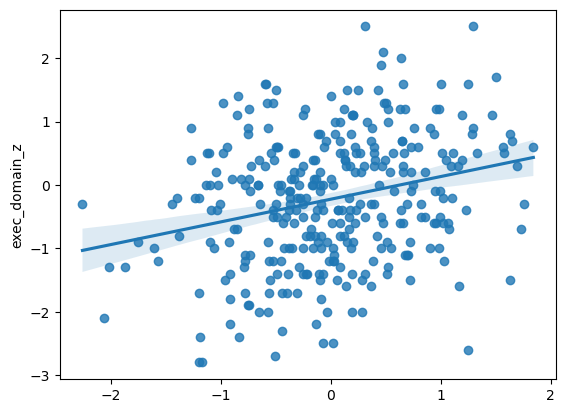

In [28]:
# Generate a plot between covariate controlled processing_domain_z and exec_domain_z

q3_plot = sns.regplot(data = data, y = 'exec_domain_z', x = proc_res.residuals_) # SOLUTION

In [29]:
# Use pg.corr to calculate the correlation between the two variables using a `pearson` correlation metric

q3_corr_res = pg.corr(proc_res.residuals_, data['exec_domain_z'], method='pearson') # SOLUTION
q3_corr_res

,n,r,CI95%,p-val,BF10,power
pearson,325,0.262902,"[0.16, 0.36]",0.000002,6832.352,0.997999


In [30]:
# Are processing_domain_z and covariate controlled exec_domain_z still correlated?
q3_corr_sig = 'yes' # SOLUTION


# Correlation r-value
# Place the r-value here rounded to 4 decimal places
q3_corr_r = 0.2629 # SOLUTION

The process we have just completed:
 - Regression of `dv` with covariates
 - Utilizing residuals for corrlation with other variables

Is called _partial correlation_.
Nicely, `pingouin` has a tool for that: `pg.partial_corr`.
Read the documentation and examples and perform the same analysis using that tool.

In [31]:
# BEGIN SOLUTION NO PROMPT

data_cols = ['YearsSeropositive', 'education', 'age',
             'processing_domain_z', 'exec_domain_z']

data_with_dummies = pd.concat([data[data_cols],
                               pd.get_dummies(data['race'], drop_first=True).astype(float),
                               pd.get_dummies(data['sex'], drop_first=True).astype(float),
                               pd.get_dummies(data['ART'], drop_first=True).astype(float),
                              ], axis=1)

partial_res = pg.partial_corr(data_with_dummies, x = 'processing_domain_z', y = 'exec_domain_z',
                              x_covar = ['YearsSeropositive', 'education', 'age', 'C', 'H', 'male', 'Truvada'],
                             )

# END SOLUTION

# Partial correlation r-value
# Place the r-value here rounded to 4 decimal places
q3_partial_corr_r = 0.2629 # SOLUTION

In [32]:
# Are the results the same between the two methods? 'yes' or 'no'

q3_same_res = 'yes' # SOLUTION

In [33]:
print(f'q3_plot is a `Figure` or `Axes`: {isinstance(q3_plot, (plt.Figure, plt.Axes))}')

q3_plot is a `Figure` or `Axes`: True


In [34]:
print(f'q3_corr_res is a `DataFrame`: {isinstance(q3_corr_res, pd.DataFrame)}')

q3_corr_res is a `DataFrame`: True


In [35]:
print('q3_corr_sig is str and {"yes", "no"}`:',
      isinstance(q3_corr_sig, str) and q3_corr_sig in {'yes', 'no'})

q3_corr_sig is str and {"yes", "no"}`: True


In [36]:
print(f'q3_corr_r is a `float`: {isinstance(q3_corr_r, float)}')

q3_corr_r is a `float`: True


In [37]:
print(f'q3_partial_corr_r is a `float`: {isinstance(q3_partial_corr_r, float)}')

q3_partial_corr_r is a `float`: True


In [38]:
print('q3_same_res is str and {"yes", "no"}`:',
      isinstance(q3_same_res, str) and q3_same_res in {'yes', 'no'})

q3_same_res is str and {"yes", "no"}`: True


In [39]:
# HIDDEN
print(f'q3_corr_res is `pearson`:', q3_corr_res.index[0] == 'pearson')

q3_corr_res is `pearson`: True


In [40]:
# HIDDEN
print(f'q3_corr_r =', q3_corr_r)

q3_corr_r = 0.2629


In [41]:
# HIDDEN
print(f'q3_partial_corr_r =', q3_partial_corr_r)

q3_partial_corr_r = 0.2629


In [42]:
# HIDDEN
print(f'q3_same_res =', q3_same_res)

q3_same_res = yes


We've seen from above that it is important to create `processing_domain_z` score corrected for covariates.
We also saw in the walkthrough that it is important create an `exec_domain_z` score corrected for covariates.
However, `pg.partial_corr` only allows you to correct for covariates in `x` or `y` but not **both**.

Use another regression to remove the covaraites from `exec_domain_z` and determine if it is correlated with `processing_domain_z` after removing covariates.

### Q4: Are EDZ and PDZ correlated after controlling for covariates?

Create a similar regression model for `exec_domain_z` that controls for Age, Race, Sex, Education, Years Seropositive, and ART.
Thus creating a measure of `exec_domain_z` independent of these covariates.
Measure the corlation of the adjusted metrics for both EDZ and PDZ.

Checked variables:
 * `q4_plot` - A regression plot between covariate controlled `exec_domain_z` and the covariate controlled `processing_domain_z`.
 * `q4_sig_cor` -  A yes/no assessment of the correlation between covariate controlled `exec_domain_z` and the covariate controlled `processing_domain_z`.

|               |    |
| --------------|----|
| Points        | 10 |
| Public Checks | 7  |
| Hidden Tests  | 7  |

In [43]:
# Find the residuals for exec_domain_z after controlling for covariates

# BEGIN SOLUTION NO PROMPT

X = pd.concat([data[['YearsSeropositive', 'education', 'age']],
               pd.get_dummies(data['race'], drop_first=True).astype(float),
               pd.get_dummies(data['sex'], drop_first=True).astype(float),
               pd.get_dummies(data['ART'], drop_first=True).astype(float),
              ], axis=1)
y = data['exec_domain_z']
exec_res = pg.linear_regression(X, y)

# END SOLUTION

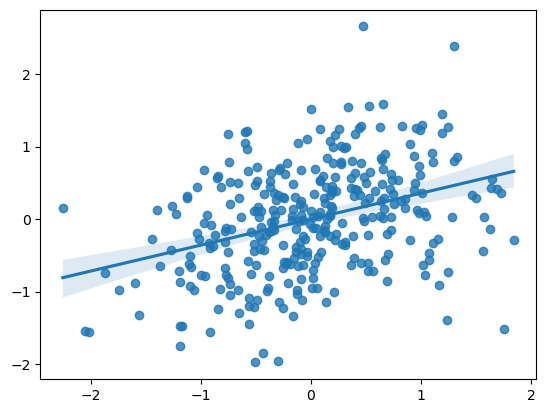

In [44]:
# Plot the two corrected values against each other

q4_plot = sns.regplot(x = proc_res.residuals_, y = exec_res.residuals_) # SOLUTION

In [45]:
# Test the correlation between the two sets of corrected values

pg.corr(proc_res.residuals_, exec_res.residuals_)

,n,r,CI95%,p-val,BF10,power
pearson,325,0.361069,"[0.26, 0.45]",1.920245e-11,3.797e+08,0.999999


In [46]:
# After correction for covariates, are PDZ and EDZ correlated? 'yes' or 'no'

q4_sig_cor = 'yes' # SOLUTION

In [47]:
print(f'q4_plot is a `Figure` or `Axes`: {isinstance(q4_plot, (plt.Figure, plt.Axes))}')

q4_plot is a `Figure` or `Axes`: True


In [48]:
print('q4_sig_cor is str and {"yes", "no"}`:',
      isinstance(q4_sig_cor, str) and q4_sig_cor in {'yes', 'no'})

q4_sig_cor is str and {"yes", "no"}`: True


In [49]:
# HIDDEN

print(f'q4_sig_cor = ', q4_sig_cor)

q4_sig_cor =  yes


--------------------------------------------

In [50]:
grader.check_all()

## Submission

Check:
 - That all tables and graphs are rendered properly.
 - Code completes without errors by using `Restart & Run All`.
 - All checks **pass**.
 
Then save the notebook and the `File` -> `Download` -> `Download .ipynb`. Upload this file to BBLearn.